## Kaggle Titanic

## Data Dictionary
#### VariableDefinitionKey: 
- survival Survival 0 = No, 1 = Yes pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
- sex Sex Age Age in years sibsp # of siblings / spouses aboard the Titanic
- parch # of parents / children aboard the Titanic ticket Ticket number fare Passenger fare cabin Cabin number 
- embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes

- pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import seaborn as sns

In [2]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/train.csv')
dataset1 = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/test.csv')
dataset2 = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/gender_submission.csv')

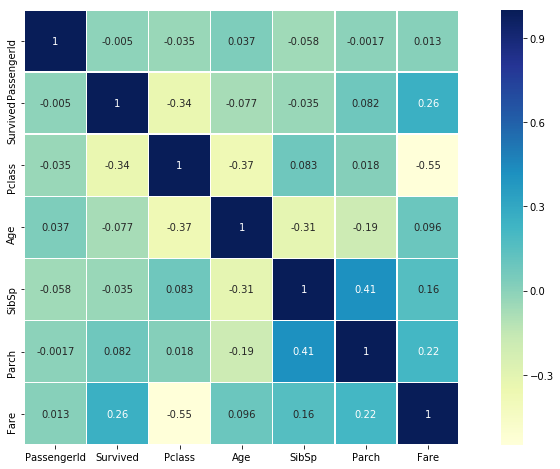

In [3]:
f, ax = plt.subplots(figsize = [15,8])
sns.heatmap(dataset.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)

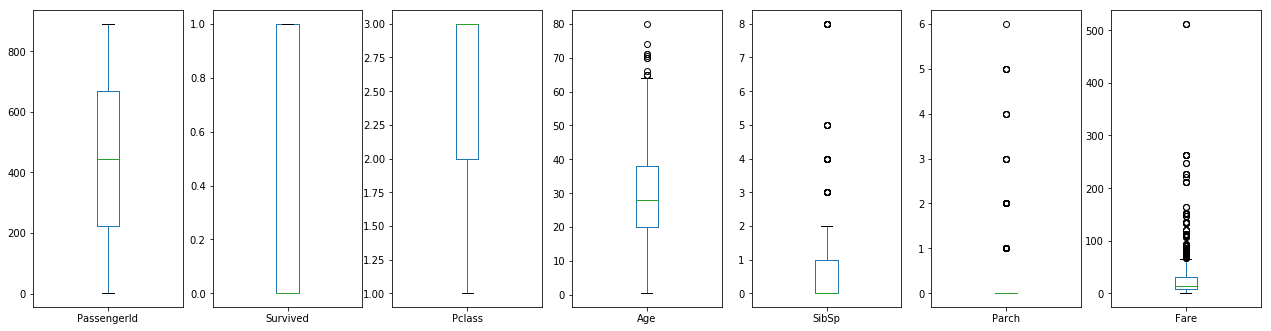

In [4]:
dataset.plot(kind='box', subplots=True, layout=(2,7), sharex=False, sharey=False,figsize=[22,12])
plt.show()

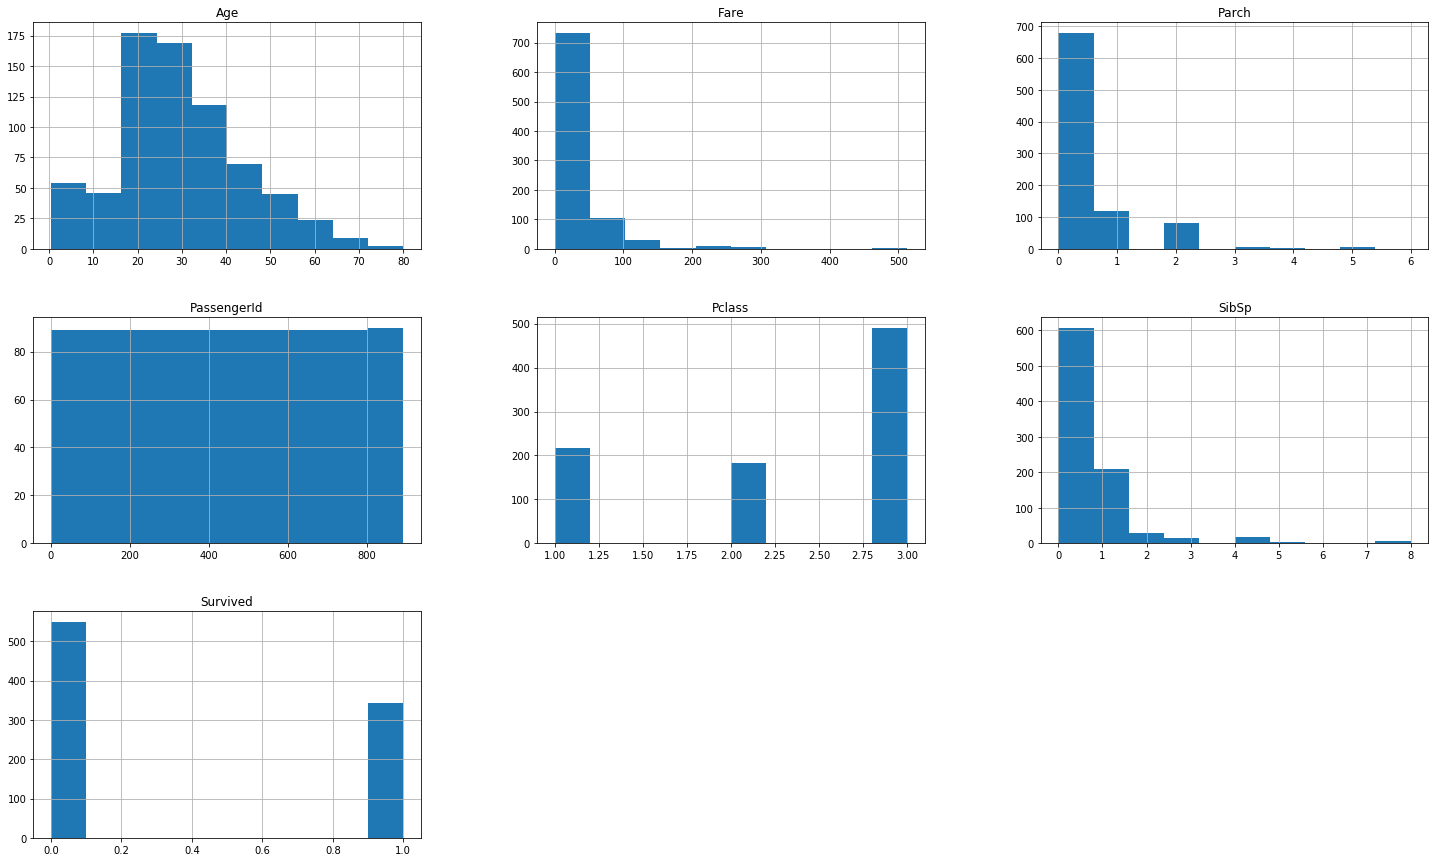

In [5]:
dataset.hist(figsize=[25,15])
plt.show()

C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

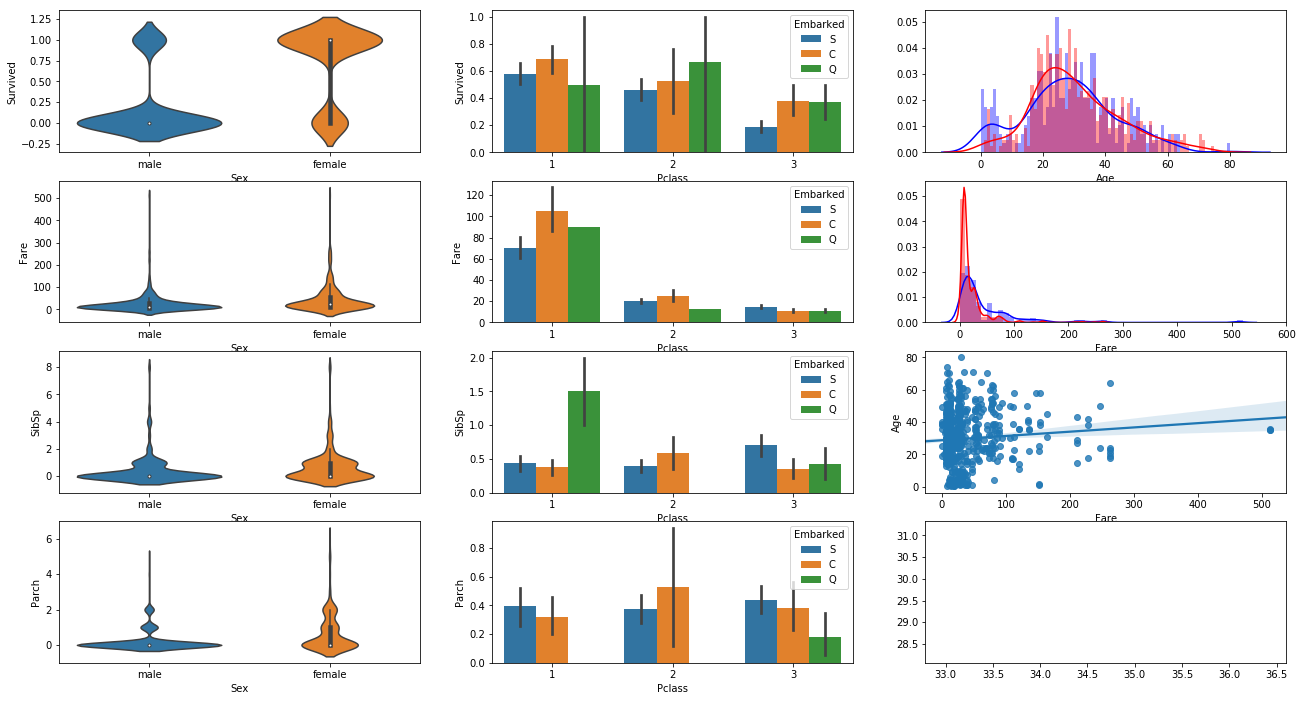

In [6]:
f, ax = plt.subplots(4, 3,figsize=[22,12])
sns.violinplot(x = 'Sex', y = 'Survived', data = dataset,ax = ax[0,0])
sns.barplot(x = 'Pclass',y ='Survived',data = dataset,hue = 'Embarked',ax = ax[0,1])
sns.distplot(dataset[dataset['Survived']==1]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',
            ax = ax[0,2])
sns.distplot(dataset[dataset['Survived']==0]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red',
            ax = ax[0,2])
sns.violinplot(x = 'Sex', y = 'Fare', data = dataset,ax = ax[1,0])
sns.barplot(x ='Pclass', y = 'Fare',data = dataset , hue = 'Embarked', ax = ax[1,1])
sns.distplot(dataset[dataset['Survived']==1]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'blue',
            ax = ax[1,2])
sns.distplot(dataset[dataset['Survived']==0]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'red',
            ax = ax[1,2])
sns.violinplot(x = 'Sex', y ='SibSp',data = dataset,ax = ax[2,0])
sns.barplot(x= 'Pclass', y = 'SibSp', data = dataset, hue = 'Embarked', ax = ax[2,1])
sns.regplot(x = 'Fare', y = 'Age', data = dataset, ax = ax[2,2])
sns.violinplot(x = 'Sex', y = 'Parch', data = dataset, ax = ax[3,0])
sns.barplot(x = 'Pclass', y = 'Parch', data = dataset, hue = 'Embarked', ax = ax[3,1])
plt.close(12)
plt.close(13)
plt.close(14)

In [7]:
dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
y_test = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/gender_submission.csv').values
y_train = dataset[['Survived']].values

In [9]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
imputer = imputer.fit(dataset[['Age']])
dataset[['Age']] = imputer.transform(dataset[['Age']])

imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
imputer = imputer.fit(dataset1[['Age']])
dataset1[['Age']] = imputer.transform(dataset1[['Age']])


dataset[['SibSp','Parch','Fare']] = dataset[['SibSp','Parch','Fare']].apply(lambda x: np.where(x.isnull(), x.dropna().sample(len(x), replace=True), x))
dataset1[['SibSp','Parch','Fare']] = dataset1[['SibSp','Parch','Fare']].apply(lambda x: np.where(x.isnull(), x.dropna().sample(len(x), replace=True), x))

In [10]:
'''DATA PREPERATION-MANIPULATION'''
dataset['Cabin'] = dataset['Cabin'].replace(regex={r'[^NaN]': 1})
dataset1['Cabin'] = dataset1['Cabin'].replace(regex={r'[^NaN]': 1})

dataset['Fam_num'] = dataset['SibSp'] + dataset['Parch']
dataset1['Fam_num'] = dataset1['SibSp'] + dataset1['Parch']

In [11]:
dataset['Fam_num'] = np.where(dataset['Fam_num'].between(1,3), 2, dataset['Fam_num'])
dataset['Fam_num'] = np.where(dataset['Fam_num'].between(4,5), 3, dataset['Fam_num'])
dataset['Fam_num'] = np.where(dataset['Fam_num'].between(5,20), 4, dataset['Fam_num'])

dataset1['Fam_num'] = np.where(dataset1['Fam_num'].between(2,3), 2, dataset1['Fam_num'])
dataset1['Fam_num'] = np.where(dataset1['Fam_num'].between(4,5), 3, dataset1['Fam_num'])
dataset1['Fam_num'] = np.where(dataset1['Fam_num'].between(5,20), 4, dataset1['Fam_num'])

In [12]:
maxfare = max(dataset['Fare'])
minfare = min(dataset['Fare'])
meanfare = np.mean(dataset['Fare'])

maxfare = max(dataset['Fare'])
minfare = min(dataset['Fare'])
meanfare = np.mean(dataset['Fare'])

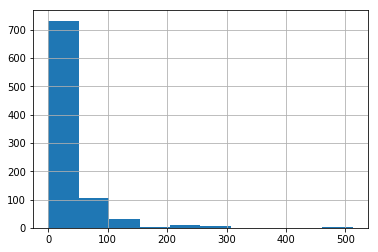

In [13]:
dataset['Fare'].hist()
plt.show()

In [14]:
'''AGE IN CATEGORIES'''
dataset['Age'] = np.where(dataset['Age'].between(0,15), 1, dataset['Age'])
dataset['Age'] = np.where(dataset['Age'].between(15,30), 2, dataset['Age'])
dataset['Age'] = np.where(dataset['Age'].between(30,50), 3, dataset['Age'])
dataset['Age'] = np.where(dataset['Age'].between(50,100), 4, dataset['Age'])


dataset1['Age'] = np.where(dataset1['Age'].between(0,15), 1, dataset1['Age'])
dataset1['Age'] = np.where(dataset1['Age'].between(15,30), 2, dataset1['Age'])
dataset1['Age'] = np.where(dataset1['Age'].between(30,50), 3, dataset1['Age'])
dataset1['Age'] = np.where(dataset1['Age'].between(50,100), 4, dataset1['Age'])

In [15]:
"""dataset = pd.concat([dataset,pd.get_dummies(dataset['Pclass'], prefix='Pclass', drop_first=True)], axis=1)
dataset1 = pd.concat([dataset1,pd.get_dummies(dataset1['Pclass'], prefix='Pclass', drop_first=True)], axis=1)
dataset.drop(['Pclass'],axis=1, inplace=True)
dataset1.drop(['Pclass'],axis=1, inplace=True)"""
dataset['Pclass'] = np.where(dataset['Pclass'].between(0,2), 0, dataset['Pclass'])
dataset['Pclass'] = np.where(dataset['Pclass'].between(3,4), 1, dataset['Pclass'])
dataset1['Pclass'] = np.where(dataset1['Pclass'].between(0,2), 0, dataset1['Pclass'])
dataset1['Pclass'] = np.where(dataset1['Pclass'].between(3,4), 1, dataset1['Pclass'])

dataset = pd.concat([dataset,pd.get_dummies(dataset['Age'], prefix='Age', drop_first=True)], axis=1)
dataset1 = pd.concat([dataset1,pd.get_dummies(dataset1['Age'], prefix='Age', drop_first=True)], axis=1)
#dataset.drop(['Age'],axis=1, inplace=True)
#dataset1.drop(['Age'],axis=1, inplace=True)

In [16]:
dataset['Fare'] = np.where(dataset['Fare'].between(0,meanfare/3), 1, dataset['Fare'])
dataset['Fare'] = np.where(dataset['Fare'].between(meanfare/3,maxfare), 0, dataset['Fare'])

dataset1['Fare'] = np.where(dataset1['Fare'].between(0,meanfare/3), 1, dataset1['Fare'])
dataset1['Fare'] = np.where(dataset1['Fare'].between(meanfare/3,maxfare), 0, dataset1['Fare'])

In [17]:
dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       1   
1            2         1       0   
2            3         1       1   
3            4         1       0   
4            5         0       1   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  2.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  3.0      1   
2                             Heikkinen, Miss. Laina  female  2.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  3.0      1   
4                           Allen, Mr. William Henry    male  3.0      0   

   Parch            Ticket  Fare  Cabin Embarked  Fam_num  Age_2.0  Age_3.0  \
0      0         A/5 21171   1.0    NaN        S        2        1        0   
1      0          PC 17599   0.0    1.0        C        2        0        1   
2      0  STON/O2. 3101282   1.0    NaN        S        0        1        0   
3      0            113803   0.0    1.0        S        2        0        1   
4      0            373450   1.0    NaN        S        0        0        1   

   Age_4.0  
0        0  
1        0  
2        0  
3        0  
4        0

In [18]:
#values = {'Sex': 1, 'Cabin': 0, 'Embarked': 'S'}
X_train = dataset.apply(lambda x: np.where(x.isnull(), x.dropna().sample(len(x), replace=True), x))
X_test = dataset1.apply(lambda x: np.where(x.isnull(), x.dropna().sample(len(x), replace=True), x))
#X_train = dataset.fillna(value=values)
#X_test = dataset1.fillna(value=values)

In [19]:
X_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fam_num', 'Age_2.0',
       'Age_3.0', 'Age_4.0'],
      dtype='object')

In [20]:
X_train = X_train.replace(['female','male'],[0,1])
X_test = X_test.replace(['female','male'],[0,1])

X_train = pd.concat([X_train,pd.get_dummies(X_train['Embarked'], prefix='Embarked', drop_first=True)], axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test['Embarked'], prefix='Embarked', drop_first=True)], axis=1)

X_train = pd.concat([X_train,pd.get_dummies(X_train['Fam_num'], prefix='Fam_num', drop_first=True)], axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test['Fam_num'], prefix='Fam_num', drop_first=True)], axis=1)

In [21]:
X_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fam_num', 'Age_2.0',
       'Age_3.0', 'Age_4.0', 'Embarked_Q', 'Embarked_S', 'Fam_num_2',
       'Fam_num_3', 'Fam_num_4'],
      dtype='object')

In [22]:
X_train= X_train[['Sex', 'Cabin', 'Pclass', 
       'Age_2.0', 'Age_3.0','Age_4.0','Fam_num_2', 'Fam_num_3', 'Fam_num_4','Fare']]
X_test= X_test[['Sex', 'Cabin', 'Pclass', 
       'Age_2.0', 'Age_3.0','Age_4.0','Fam_num_2', 'Fam_num_3', 'Fam_num_4','Fare']]

In [23]:
#np.count_nonzero(np.isnan(X_train))
# performing standard scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [24]:
np.count_nonzero(np.isnan(X_train))

0

#### Classification 

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance 
from sklearn.linear_model import LinearRegression

In [26]:
clf_rf = RandomForestClassifier()
clf_et = ExtraTreesClassifier()
clf_bc = BaggingClassifier()
clf_ada = AdaBoostClassifier()
clf_dt = DecisionTreeClassifier()
clf_xg = XGBClassifier()
clf_lr = LogisticRegression()
clf_svm = SVC(C=1.0, cache_size=100, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
Classifiers = ['RandomForest','ExtraTrees','Bagging','AdaBoost','DecisionTree','XGBoost','LogisticRegression','SVM']
scores = []
models = [clf_rf, clf_et, clf_bc, clf_ada, clf_dt, clf_xg, clf_lr, clf_svm]
for model in models:
    score = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

In [28]:
#need to get rid of 7 + need to add one hot to the Cabin info
#importing model
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

#maiing object
regressor = LinearRegression()
#trainnig the model
mean_regression = []
for i in range(5):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size = 0.2, random_state = i)
    regressor.fit(X_train_split, y_train_split)
    y_pred_split = regressor.predict(X_test_split)
    y_pred_split = y_pred_split > 0.5
    mean_regression.append(accuracy_score(y_pred_split, y_test_split))

C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [217]:
meanscore = np.array(mean_regression).mean()
Classifiers.append('Linear Regression')
scores.append(meanscore)

In [218]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
             ascending = False)

In [219]:
mode

score
ExtraTrees          0.836101
DecisionTree        0.834977
XGBoost             0.834965
Bagging             0.833841
RandomForest        0.832755
SVM                 0.829372
AdaBoost            0.811431
LogisticRegression  0.809184
Linear Regression   0.803352

In [182]:
SVM	0.832755
Bagging	0.829459
XGBoost	0.828260
LogisticRegression	0.814827
DecisionTree	0.809360
Linear Regression	0.808939
AdaBoost	0.805938
RandomForest	0.803691
ExtraTrees	0.801418

SyntaxError: invalid syntax (<ipython-input-182-d36eefa9b3f1>, line 1)

In [248]:
parameters_xg = {'max_depth':[3,6,7], 'learning_rate': [0.1,0.2], 'n_estimators': [300,200], 
                 'min_child_weight': [4], 'reg_alpha': [6,0], 'reg_lambda': [1,8],'max_delta_step':[2],
                 'gamma':[0],'seed':[1]}

parameters_svm = {'C':[0.9,0.01],'kernel':['rbf','linear'], 'gamma':[0,0.1,'auto'], 'probability':[True,False],
                  'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],'degree':[3,4,10]}

parameters_rf = {'n_estimators': [100,50], 'max_features': [7,'auto',None],
                 'n_jobs': [-1], 'min_samples_leaf': [2,4,], 'random_state':[1,7,], 
                 'min_samples_split':[2,6,], 'oob_score': [True,False],
                 'criterion': ['gini'], 'warm_start': [True,False]}


parameters_extraTrees =  {'n_estimators': [1, 10, 100, 1000], 'min_impurity_decrease': [0,0.001, 0.0001]
                         ,'n_jobs':[1,2,3,5,10]}


In [221]:
def grid(model,parameters,X_train,y_train):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, 
                        scoring = 'accuracy')
    grid.fit(X_train,np.ravel(y_train))
    return grid.best_score_, grid.best_estimator_.get_params()

In [222]:
def imp_features(model, model_name, params,X_train,y_train):
    Model = model(**params)
    Model.fit(X_train,y_train)
    names = ['Sex', 'Cabin', 'Pclass',
       'Age_2.0', 'Age_3.0','Age_4.0','Fam_num_2.0', 'Fam_num_3.0', 'Fam_num_4.0','Fare']
    feature = Model.feature_importances_
    important_features = pd.Series(data = feature, index = names,)
    important_features = important_features.sort_values(ascending = True)
    return important_features.plot(kind = 'barh', grid = False,title = model_name)

In [249]:
%%capture
best_score_et, best_params_et = grid(clf_et,parameters_extraTrees,X_train,y_train)

In [250]:
print(best_score_et)

0.8395061728395061


In [223]:
%%capture
best_score_xg, best_params_xg = grid(clf_xg,parameters_xg,X_train,y_train)

In [224]:
print(best_score_xg)

0.8383838383838383


C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


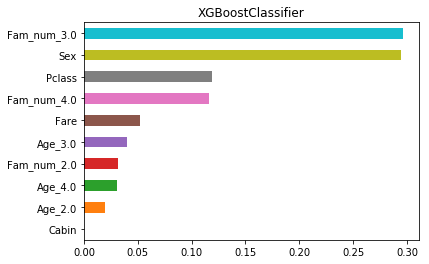

In [225]:
imp_features(XGBClassifier, 'XGBoostClassifier', best_params_xg,X_train,y_train)

In [226]:
%%capture
best_score_svm, best_params_svm = grid(clf_svm, parameters_svm,X_train,y_train)

In [227]:
print(best_score_svm)

0.8260381593714927


In [228]:
best_params_svm

{'C': 0.9,
 'cache_size': 100,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [229]:
#we can not use it in SVM (we might can use it in RandomForest)
#imp_features(SVC, 'SVM', best_params_svm,X_train,y_train)

In [230]:
def boundaries(model, heading, best_params):
    Model = model(**best_params)
    Model.fit(X_train_reduced, y_train)

    X_set, y_set = np.concatenate([X_train_reduced, X_test_reduced], axis = 0), np.concatenate([y_train, y_test], axis = 0)
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                             np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    #plt.figure(figsize = [15,16])
    plt.contourf(X1, X2, Model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                     alpha = 0.5, cmap = ListedColormap(('k', 'blue')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    plt.xticks(fontsize = 3)
    plt.yticks(fontsize = 3)

In [231]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
X_train_reduced = PCA(n_components = 2).fit_transform(X_train)
X_test_reduced  = PCA(n_components =  2).fit_transform(X_test)

Text(0.5,1,'Support Vector Machines')

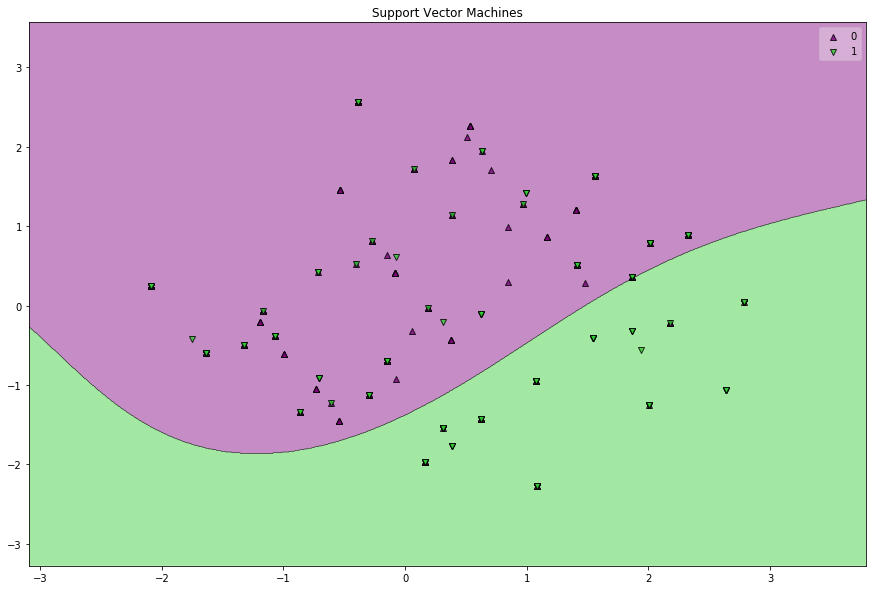

In [232]:
from mlxtend.plotting import plot_decision_regions
t = np.array(y_train)
t = np.ravel(t.astype(np.integer))
clf_svm = SVC(**best_params_svm)
clf_svm.fit(X_train_reduced,t)
plt.figure(figsize = [15,10])
plot_decision_regions(X_train_reduced, t, clf = clf_svm, hide_spines = False, colors = 'purple,limegreen',
                      markers = ['^','v'])
plt.title('Support Vector Machines')

In [233]:
clf_svm = SVC(**best_params_svm)
clf_svm.fit(X_train,y_train)
dataset2 = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/gender_submission.csv')
y_test = dataset2.values
pred = clf_svm.predict(X_test)
predictions = pd.DataFrame(pred, columns = ['Survived'])
X = pd.concat([dataset2['PassengerId'],predictions['Survived']], axis=1)

C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [234]:
X.set_index('PassengerId').to_csv('predictions_svm_with_groups.csv')

In [235]:
accuracy_score(X['Survived'].values, y_test[:,1])

0.8995215311004785

### XGBoost

In [236]:
clf_xg = XGBClassifier(**best_params_xg)
clf_xg.fit(X_train,y_train)
dataset2 = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/gender_submission.csv')
y_test = dataset2.values
pred = clf_xg.predict(X_test)
predictions = pd.DataFrame(pred, columns = ['Survived'])
X = pd.concat([dataset2['PassengerId'],predictions['Survived']], axis=1)

C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [237]:
X.set_index('PassengerId').to_csv('predictions_xg_with_groups.csv')

In [238]:
accuracy_score(X['Survived'].values, y_test[:,1])

0.8803827751196173

### Extra Trees

In [252]:
clf_et =  ExtraTreesClassifier(**best_params_et)
clf_et.fit(X_train,y_train)
dataset2 = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/gender_submission.csv')
y_test = dataset2.values
pred = clf_et.predict(X_test)
predictions = pd.DataFrame(pred, columns = ['Survived'])
X = pd.concat([dataset2['PassengerId'],predictions['Survived']], axis=1)

C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [253]:
X.set_index('PassengerId').to_csv('predictions_et_with_groups.csv')

In [254]:
accuracy_score(X['Survived'].values, y_test[:,1])

0.9138755980861244

### Lets see some NN

In [122]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [123]:
from keras import Sequential
from keras.layers import Dense

In [124]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=10))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [125]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [126]:
eval_model=classifier.fit(X_train, y_train, epochs=300)

Epoch 1/300
891/891 [==============================] - 0s 318us/step - loss: 0.6916 - acc: 0.6229
Epoch 2/300
891/891 [==============================] - 0s 39us/step - loss: 0.6874 - acc: 0.6162
Epoch 3/300
891/891 [==============================] - 0s 34us/step - loss: 0.6807 - acc: 0.6162
Epoch 4/300
891/891 [==============================] - 0s 36us/step - loss: 0.6691 - acc: 0.6790
Epoch 5/300
891/891 [==============================] - 0s 42us/step - loss: 0.6509 - acc: 0.7755
Epoch 6/300
891/891 [==============================] - 0s 31us/step - loss: 0.6250 - acc: 0.8013
Epoch 7/300
891/891 [==============================] - 0s 39us/step - loss: 0.5928 - acc: 0.8058
Epoch 8/300
891/891 [==============================] - 0s 34us/step - loss: 0.5595 - acc: 0.7912
Epoch 9/300
891/891 [==============================] - 0s 39us/step - loss: 0.5267 - acc: 0.7957
Epoch 10/300
891/891 [==============================] - 0s 31us/step - loss: 0.4997 - acc: 0.8013
Epoch 11/300
891/891 [======

891/891 [==============================] - 0s 28us/step - loss: 0.4094 - acc: 0.8373
Epoch 168/300
891/891 [==============================] - 0s 27us/step - loss: 0.4093 - acc: 0.8373
Epoch 169/300
891/891 [==============================] - 0s 31us/step - loss: 0.4091 - acc: 0.8373
Epoch 170/300
891/891 [==============================] - 0s 31us/step - loss: 0.4092 - acc: 0.8373
Epoch 171/300
891/891 [==============================] - 0s 28us/step - loss: 0.4089 - acc: 0.8373
Epoch 172/300
891/891 [==============================] - 0s 34us/step - loss: 0.4091 - acc: 0.8373
Epoch 173/300
891/891 [==============================] - 0s 27us/step - loss: 0.4092 - acc: 0.8373
Epoch 174/300
891/891 [==============================] - 0s 30us/step - loss: 0.4094 - acc: 0.8373
Epoch 175/300
891/891 [==============================] - 0s 33us/step - loss: 0.4091 - acc: 0.8373
Epoch 176/300
891/891 [==============================] - 0s 28us/step - loss: 0.4087 - acc: 0.8373
Epoch 177/300
891/891 [=

In [127]:
y_pred=classifier.predict(X_test)
y_pred = np.squeeze(y_pred)

In [128]:
y_pred = y_pred>0.5

In [129]:
y_pred = y_pred.astype(int)    
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [130]:
y_test2 = [y[1] for y in y_test]

In [131]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, y_pred)
print(cm)

[[256  10]
 [ 37 115]]


In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2, y_pred)

0.8875598086124402

In [133]:
dataset2 = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/gender_submission.csv')
y_test = dataset2.values
predictions = pd.DataFrame(y_test2, columns = ['Survived'])
X = pd.concat([dataset2['PassengerId'],predictions['Survived']], axis=1)

In [134]:
X.set_index('PassengerId').to_csv('predictions_NN.csv')